- 使用knn实现手写数字图片的识别

In [5]:
import matplotlib.pyplot as plt #可视化作图
from sklearn.model_selection import train_test_split #数据集切分
from sklearn.model_selection import cross_val_score #交叉验证
from sklearn.neighbors import KNeighborsClassifier ##knn
import pandas as pd
import numpy as np

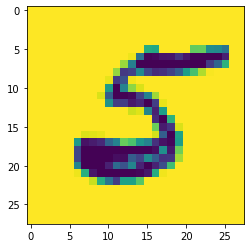

In [9]:
#读取其中一张图片，简单看下效果
img_arr = plt.imread('./digist/5/5_101.bmp')
plt.imshow(img_arr)

In [10]:
img_arr.shape #注意，图片数据的形状，是二维的，没有RGB通道

(28, 28)

In [11]:
#生成样本数据（用来训练模型）
feature = []
target = []
for i in range(10):
    for j in range(1,501):
        #./digist/5/5_101.bmp
        img_path = './digist/'+str(i)+'/'+str(i)+'_'+str(j)+'.bmp' #用i和j拼出每个bmp文件的路径
        img_arr = plt.imread(img_path)
        feature.append(img_arr)
        target.append(i)

    - 重要的注意事项：训练模型只可以传入二维的特征数据，当前feature是三维的

In [13]:
#将列表变成numpy数组
feature = np.array(feature)
target = np.array(target)

In [16]:
feature.shape

(5000, 28, 28)

In [17]:
#将featrue变形成2维（通过把二维图片拉长成一维）
feature = feature.reshape((5000,28*28))

In [18]:
feature.shape

(5000, 784)

In [19]:
#切分数据集
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.1,random_state=2021)

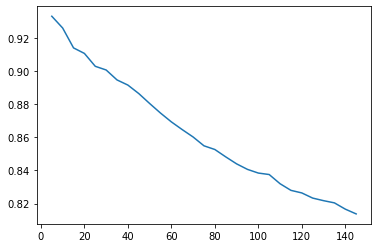

In [20]:
#寻找模型最优的超参数（此处基于交叉验证）
ks = np.arange(5,150,5)
scores = []
for k in ks:
    knn = KNeighborsClassifier(k)
    score = cross_val_score(knn,x_train,y_train,cv=5).mean() #5折交叉验证
    scores.append(score)
plt.plot(ks,scores)

In [21]:
scores = np.array(scores)
max_value_index = np.argmax(scores)
print('最优的k值：',ks[max_value_index])

最优的k值： 5


In [22]:
#建立模型，基于最优的超参数(即 k = 5 ）进行模型训练
knn = KNeighborsClassifier(5)
knn.fit(x_train,y_train)
print(knn.score(x_test,y_test))
print('模型分类结果:',knn.predict(x_test))
print('真实的分类结果:',y_test)

0.918
模型分类结果: [2 2 6 8 8 3 9 6 0 1 9 3 2 4 2 0 6 8 3 9 1 7 3 7 6 0 7 0 6 6 6 9 4 0 7 5 2
 3 8 2 7 4 5 1 5 2 7 4 9 2 1 8 0 6 7 7 6 0 9 2 9 1 3 5 7 0 5 6 2 2 1 8 7 6
 2 5 6 9 9 3 0 4 1 5 0 6 9 0 5 0 1 4 1 9 1 2 8 0 9 2 9 7 6 8 0 8 1 6 1 6 5
 3 8 7 7 0 0 9 9 3 5 4 4 9 0 7 1 7 2 4 0 0 6 8 9 4 2 6 9 1 1 8 5 3 4 5 4 0
 0 1 3 5 2 5 0 4 6 7 4 2 2 7 5 0 6 0 2 4 2 1 7 0 2 3 9 0 4 2 1 8 3 2 7 8 2
 6 6 2 4 6 7 3 3 8 3 9 9 5 4 6 0 3 1 4 1 9 1 6 6 3 3 9 1 6 8 6 1 3 3 5 0 6
 3 7 8 7 1 5 3 4 1 2 1 6 4 0 3 3 1 5 0 9 7 3 4 3 9 6 8 2 2 0 3 3 4 0 3 6 6
 3 8 8 0 5 7 1 5 2 2 7 7 2 3 8 3 0 3 6 7 7 6 2 8 2 9 9 5 3 9 9 9 2 8 7 0 1
 0 8 4 7 7 4 1 3 7 9 9 2 0 0 2 6 2 5 1 7 6 1 4 5 8 6 1 4 6 8 3 0 4 0 0 6 6
 5 3 0 4 5 9 1 1 5 5 7 7 5 0 3 9 0 5 6 3 8 9 0 0 9 3 6 9 4 4 9 0 7 4 2 5 3
 1 1 7 9 9 5 9 7 3 0 4 3 2 7 9 2 7 1 9 1 4 0 4 1 5 1 7 3 1 1 9 2 5 9 7 8 6
 6 7 0 9 2 0 2 9 1 1 9 9 3 7 2 2 2 6 1 5 9 2 1 2 0 5 4 9 6 3 7 5 4 5 8 2 2
 9 6 2 0 7 1 7 2 1 7 3 1 4 8 3 6 1 1 3 5 8 5 9 4 3 0 5 5 6 6 7 0 2 3 9 4 2
 1 1 8 5 7 

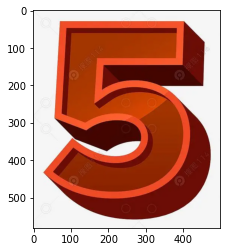

In [47]:
#将训练好的模型作用的外部的未知数据中
img_arr = plt.imread('./write05.jpg')
plt.imshow(img_arr)

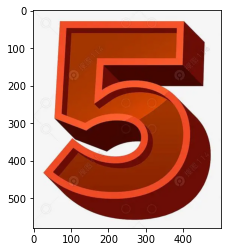

In [48]:
#将5裁剪下来
five_img_arr = img_arr[0:580,0:500]
plt.imshow(five_img_arr)

In [49]:
five_img_arr.shape

(580, 500, 3)

In [50]:
x_train[1].shape #转换成这种才能进行预测

(784,)

- 训练好的模型识别的图片数据只能是对28*28像素图片进行扁平化处理后的数据

In [51]:
#将five_img_arr进行像素的等比例压缩（28*28），在对其进行扁平化处理即可
import scipy.ndimage as ndimage
five_img_arr_zoom = ndimage.zoom(five_img_arr,zoom=(28/580,28/500,1/3))

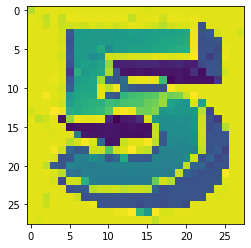

In [52]:
plt.imshow(five_img_arr_zoom)

In [53]:
knn.predict([five_img_arr_zoom.reshape(784,)]) #把28x28变成一行784列

array([5])

- knn评价
    - 精度高，运算成本高